# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# setting option to display visualizations without having to call them

%matplotlib inline

# setting option to display all columns in the dataframe

pd.set_option('display.max_columns', None)

# 2. Import Dataframe

In [3]:
flights = pd.read_pickle(r"C:\Users\xherr\Desktop\A6 Data Immersion\2. DATASETS\3. US FLIGHTS 2022 (task 6.2).pkl")

In [4]:
flights.head()

MONTH DAY_OF_MONTH DAY_OF_WEEK   FL_DATE MKT_CARRIER ORIGIN  \
0     1            1           6  1/1/2022          AA    ATL   
1     1            1           6  1/1/2022          AA    ATL   
2     1            1           6  1/1/2022          AA    ATL   
3     1            1           6  1/1/2022          AA    ATL   
4     1            1           6  1/1/2022          AA    ATL   

  ORIGIN_CITY_NAME ORIGIN_STATE_NM DEST DEST_CITY_NAME   DEST_STATE_NM  \
0      Atlanta, GA         Georgia  CLT  Charlotte, NC  North Carolina   
1      Atlanta, GA         Georgia  CLT  Charlotte, NC  North Carolina   
2      Atlanta, GA         Georgia  CLT  Charlotte, NC  North Carolina   
3      Atlanta, GA         Georgia  CLT  Charlotte, NC  North Carolina   
4      Atlanta, GA         Georgia  CLT  Charlotte, NC  North Carolina   

   DEP_TIME  DEP_DELAY  DEP_DEL15  DEP_DELAY_GROUP  TAXI_OUT WHEELS_OFF  \
0     640.0       -5.0        0.0             -1.0      15.0      655.0   
1     832.0       -4.0        0.0             -1.0      16.0      848.0   
2    1046.0       -5.0        0.0             -1.0      18.0     1104.0   
3    1251.0       -3.0        0.0             -1.0      21.0     1312.0   
4    1604.0       -1.0        0.0             -1.0      21.0     1625.0   

  WHEELS_ON  TAXI_IN  ARR_TIME  ARR_DELAY  ARR_DEL15  ARR_DELAY_GROUP  \
0     744.0      7.0     751.0      -18.0        0.0             -2.0   
1     935.0      9.0     944.0      -21.0        0.0             -2.0   
2    1149.0     18.0    1207.0      -18.0        0.0             -2.0   
3    1359.0     15.0    1414.0       -7.0        0.0             -1.0   
4    1714.0     12.0    1726.0       -4.0        0.0             -1.0   

  CANCELLED CANCELLATION_CODE  AIR_TIME  DISTANCE  CARRIER_DELAY  \
0       0.0               nan      49.0     226.0            NaN   
1       0.0               nan      47.0     226.0            NaN   
2       0.0               nan      45.0     226.0            NaN   
3       0.0               nan      47.0     226.0            NaN   
4       0.0               nan      49.0     226.0            NaN   

   WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  \
0            NaN        NaN             NaN                  NaN   
1            NaN        NaN             NaN                  NaN   
2            NaN        NaN             NaN                  NaN   
3            NaN        NaN             NaN                  NaN   
4            NaN        NaN             NaN                  NaN   

  HAUL_CATEGORY  DEP_HOUR  ARR_HOUR  
0    Short-haul       6.0       7.0  
1    Short-haul       8.0       9.0  
2    Short-haul      10.0      12.0  
3    Short-haul      12.0      14.0  
4    Short-haul      16.0      17.0

In [5]:
# check the data types for each column

flights.dtypes

MONTH                   object
DAY_OF_MONTH            object
DAY_OF_WEEK             object
FL_DATE                 object
MKT_CARRIER             object
ORIGIN                  object
ORIGIN_CITY_NAME        object
ORIGIN_STATE_NM         object
DEST                    object
DEST_CITY_NAME          object
DEST_STATE_NM           object
DEP_TIME               float64
DEP_DELAY              float64
DEP_DEL15              float64
DEP_DELAY_GROUP        float64
TAXI_OUT               float64
WHEELS_OFF              object
WHEELS_ON               object
TAXI_IN                float64
ARR_TIME               float64
ARR_DELAY              float64
ARR_DEL15              float64
ARR_DELAY_GROUP        float64
CANCELLED               object
CANCELLATION_CODE       object
AIR_TIME               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
HAUL_CAT

# 3. Clean your data so that it’s ready for analysis

For this task, because of the nature of my dataframe, I have to create a dataset from it to extract meaningful information and to test the hypothesis: 
- As airport traffic (number of departures) decreases, the percentage of early departures increases.

In [6]:
# convert 'FL_DATE' to datetime format

flights['FL_DATE'] = pd.to_datetime(flights['FL_DATE'])

In [7]:
# dropping all rows with missing value in DEP_HOUR column

flights.dropna(subset=['DEP_HOUR'], inplace=True)

In [8]:
# convert 'DEP_HOUR' to integer

flights['DEP_HOUR'] = flights['DEP_HOUR'].astype(int)

In [9]:
# combine 'FL_DATE' and 'DEP_HOUR' into a new column 'DATETIME'

flights['DATETIME'] = flights['FL_DATE'] + pd.to_timedelta(flights['DEP_HOUR'], unit='H')

In [10]:
flights.head()

MONTH DAY_OF_MONTH DAY_OF_WEEK    FL_DATE MKT_CARRIER ORIGIN  \
0     1            1           6 2022-01-01          AA    ATL   
1     1            1           6 2022-01-01          AA    ATL   
2     1            1           6 2022-01-01          AA    ATL   
3     1            1           6 2022-01-01          AA    ATL   
4     1            1           6 2022-01-01          AA    ATL   

  ORIGIN_CITY_NAME ORIGIN_STATE_NM DEST DEST_CITY_NAME   DEST_STATE_NM  \
0      Atlanta, GA         Georgia  CLT  Charlotte, NC  North Carolina   
1      Atlanta, GA         Georgia  CLT  Charlotte, NC  North Carolina   
2      Atlanta, GA         Georgia  CLT  Charlotte, NC  North Carolina   
3      Atlanta, GA         Georgia  CLT  Charlotte, NC  North Carolina   
4      Atlanta, GA         Georgia  CLT  Charlotte, NC  North Carolina   

   DEP_TIME  DEP_DELAY  DEP_DEL15  DEP_DELAY_GROUP  TAXI_OUT WHEELS_OFF  \
0     640.0       -5.0        0.0             -1.0      15.0      655.0   
1     832.0       -4.0        0.0             -1.0      16.0      848.0   
2    1046.0       -5.0        0.0             -1.0      18.0     1104.0   
3    1251.0       -3.0        0.0             -1.0      21.0     1312.0   
4    1604.0       -1.0        0.0             -1.0      21.0     1625.0   

  WHEELS_ON  TAXI_IN  ARR_TIME  ARR_DELAY  ARR_DEL15  ARR_DELAY_GROUP  \
0     744.0      7.0     751.0      -18.0        0.0             -2.0   
1     935.0      9.0     944.0      -21.0        0.0             -2.0   
2    1149.0     18.0    1207.0      -18.0        0.0             -2.0   
3    1359.0     15.0    1414.0       -7.0        0.0             -1.0   
4    1714.0     12.0    1726.0       -4.0        0.0             -1.0   

  CANCELLED CANCELLATION_CODE  AIR_TIME  DISTANCE  CARRIER_DELAY  \
0       0.0               nan      49.0     226.0            NaN   
1       0.0               nan      47.0     226.0            NaN   
2       0.0               nan      45.0     226.0            NaN   
3       0.0               nan      47.0     226.0            NaN   
4       0.0               nan      49.0     226.0            NaN   

   WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  \
0            NaN        NaN             NaN                  NaN   
1            NaN        NaN             NaN                  NaN   
2            NaN        NaN             NaN                  NaN   
3            NaN        NaN             NaN                  NaN   
4            NaN        NaN             NaN                  NaN   

  HAUL_CATEGORY  DEP_HOUR  ARR_HOUR            DATETIME  
0    Short-haul         6       7.0 2022-01-01 06:00:00  
1    Short-haul         8       9.0 2022-01-01 08:00:00  
2    Short-haul        10      12.0 2022-01-01 10:00:00  
3    Short-haul        12      14.0 2022-01-01 12:00:00  
4    Short-haul        16      17.0 2022-01-01 16:00:00

In [11]:
# checking length of dataframe

len(flights)

1327250

In [12]:
# creating groupby table based on DATETIME column

flights.groupby(['DATETIME','ORIGIN']).count()

MONTH  DAY_OF_MONTH  DAY_OF_WEEK  FL_DATE  \
DATETIME            ORIGIN                                              
2022-01-01 00:00:00 ATL         4             4            4        4   
                    DEN        24            24           24       24   
                    DFW        10            10           10       10   
                    LAX         7             7            7        7   
2022-01-01 01:00:00 ATL         1             1            1        1   
...                           ...           ...          ...      ...   
2022-12-31 23:00:00 ATL        10            10           10       10   
                    DEN         7             7            7        7   
                    DFW         1             1            1        1   
                    LAX        15            15           15       15   
                    ORD         1             1            1        1   

                            MKT_CARRIER  ORIGIN_CITY_NAME  ORIGIN_STATE_NM  \
DATETIME            ORIGIN                                                   
2022-01-01 00:00:00 ATL               4                 4                4   
                    DEN              24                24               24   
                    DFW              10                10               10   
                    LAX               7                 7                7   
2022-01-01 01:00:00 ATL               1                 1                1   
...                                 ...               ...              ...   
2022-12-31 23:00:00 ATL              10                10               10   
                    DEN               7                 7                7   
                    DFW               1                 1                1   
                    LAX              15                15               15   
                    ORD               1                 1                1   

                            DEST  DEST_CITY_NAME  DEST_STATE_NM  DEP_TIME  \
DATETIME            ORIGIN                                                  
2022-01-01 00:00:00 ATL        4               4              4         4   
                    DEN       24              24             24        24   
                    DFW       10              10             10        10   
                    LAX        7               7              7         7   
2022-01-01 01:00:00 ATL        1               1              1         1   
...                          ...             ...            ...       ...   
2022-12-31 23:00:00 ATL       10              10             10        10   
                    DEN        7               7              7         7   
                    DFW        1               1              1         1   
                    LAX       15              15             15        15   
                    ORD        1               1              1         1   

                            DEP_DELAY  DEP_DEL15  DEP_DELAY_GROUP  TAXI_OUT  \
DATETIME            ORIGIN                                                    
2022-01-01 00:00:00 ATL             4          4                4         4   
                    DEN            24         24               24        24   
                    DFW            10         10               10        10   
                    LAX             7          7                7         7   
2022-01-01 01:00:00 ATL             1          1                1         1   
...                               ...        ...              ...       ...   
2022-12-31 23:00:00 ATL            10         10               10        10   
                    DEN             7          7                7         7   
                    DFW             1          1                1         1   
                    LAX            15         15               15        15   
                    ORD             1          1                1         1   

                            WHEEL

In [13]:
# create calculated columns for conditions 

# this will allow me to count the number of rows that meet the conditions for each column and then I'll be able to 
# count those occurrances in the groupby function

flights['LATE_DEPS_3+'] = (flights['DEP_DELAY'] > 2.99).astype(int)
flights['EARLY_DEPS'] = (flights['DEP_DELAY'] < 0.0).astype(int)
flights['EARLY_DEPS_5+'] = (flights['DEP_DELAY'] < -5.0).astype(int)

flights.head()

MONTH DAY_OF_MONTH DAY_OF_WEEK    FL_DATE MKT_CARRIER ORIGIN  \
0     1            1           6 2022-01-01          AA    ATL   
1     1            1           6 2022-01-01          AA    ATL   
2     1            1           6 2022-01-01          AA    ATL   
3     1            1           6 2022-01-01          AA    ATL   
4     1            1           6 2022-01-01          AA    ATL   

  ORIGIN_CITY_NAME ORIGIN_STATE_NM DEST DEST_CITY_NAME   DEST_STATE_NM  \
0      Atlanta, GA         Georgia  CLT  Charlotte, NC  North Carolina   
1      Atlanta, GA         Georgia  CLT  Charlotte, NC  North Carolina   
2      Atlanta, GA         Georgia  CLT  Charlotte, NC  North Carolina   
3      Atlanta, GA         Georgia  CLT  Charlotte, NC  North Carolina   
4      Atlanta, GA         Georgia  CLT  Charlotte, NC  North Carolina   

   DEP_TIME  DEP_DELAY  DEP_DEL15  DEP_DELAY_GROUP  TAXI_OUT WHEELS_OFF  \
0     640.0       -5.0        0.0             -1.0      15.0      655.0   
1     832.0       -4.0        0.0             -1.0      16.0      848.0   
2    1046.0       -5.0        0.0             -1.0      18.0     1104.0   
3    1251.0       -3.0        0.0             -1.0      21.0     1312.0   
4    1604.0       -1.0        0.0             -1.0      21.0     1625.0   

  WHEELS_ON  TAXI_IN  ARR_TIME  ARR_DELAY  ARR_DEL15  ARR_DELAY_GROUP  \
0     744.0      7.0     751.0      -18.0        0.0             -2.0   
1     935.0      9.0     944.0      -21.0        0.0             -2.0   
2    1149.0     18.0    1207.0      -18.0        0.0             -2.0   
3    1359.0     15.0    1414.0       -7.0        0.0             -1.0   
4    1714.0     12.0    1726.0       -4.0        0.0             -1.0   

  CANCELLED CANCELLATION_CODE  AIR_TIME  DISTANCE  CARRIER_DELAY  \
0       0.0               nan      49.0     226.0            NaN   
1       0.0               nan      47.0     226.0            NaN   
2       0.0               nan      45.0     226.0            NaN   
3       0.0               nan      47.0     226.0            NaN   
4       0.0               nan      49.0     226.0            NaN   

   WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  \
0            NaN        NaN             NaN                  NaN   
1            NaN        NaN             NaN                  NaN   
2            NaN        NaN             NaN                  NaN   
3            NaN        NaN             NaN                  NaN   
4            NaN        NaN             NaN                  NaN   

  HAUL_CATEGORY  DEP_HOUR  ARR_HOUR            DATETIME  LATE_DEPS_3+  \
0    Short-haul         6       7.0 2022-01-01 06:00:00             0   
1    Short-haul         8       9.0 2022-01-01 08:00:00             0   
2    Short-haul        10      12.0 2022-01-01 10:00:00             0   
3    Short-haul        12      14.0 2022-01-01 12:00:00             0   
4    Short-haul        16      17.0 2022-01-01 16:00:00             0   

   EARLY_DEPS  EARLY_DEPS_5+  
0           1              0  
1           1              0  
2           1              0  
3           1              0  
4           1              0

In [14]:
# creating the groupby table

grouped_flights = flights.groupby(['DATETIME', 'ORIGIN']).agg({
    'DEP_TIME': 'count',  # Total departures
    'DEP_DEL15': 'sum',  # Late over 15 minutes
    'LATE_DEPS_3+': 'sum',  # Late over 3 minutes
    'EARLY_DEPS': 'sum',  # All early departures
    'EARLY_DEPS_5+': 'sum'  # Early over 5 minutes
}).reset_index()

In [15]:
grouped_flights.head(40)

DATETIME ORIGIN  DEP_TIME  DEP_DEL15  LATE_DEPS_3+  EARLY_DEPS  \
0  2022-01-01 00:00:00    ATL         4        4.0             4           0   
1  2022-01-01 00:00:00    DEN        24       22.0            23           1   
2  2022-01-01 00:00:00    DFW        10       10.0            10           0   
3  2022-01-01 00:00:00    LAX         7        4.0             6           1   
4  2022-01-01 01:00:00    ATL         1        1.0             1           0   
5  2022-01-01 01:00:00    DEN        13       13.0            13           0   
6  2022-01-01 01:00:00    DFW         1        1.0             1           0   
7  2022-01-01 01:00:00    LAX         5        3.0             5           0   
8  2022-01-01 02:00:00    ATL         2        2.0             2           0   
9  2022-01-01 02:00:00    DEN         2        2.0             2           0   
10 2022-01-01 02:00:00    LAX         1        1.0             1           0   
11 2022-01-01 03:00:00    DEN         2        2.0             2           0   
12 2022-01-01 05:00:00    ATL         4        1.0             1           2   
13 2022-01-01 05:00:00    DEN         8        3.0             4           3   
14 2022-01-01 05:00:00    DFW         4        0.0             2           2   
15 2022-01-01 05:00:00    LAX         8        1.0             1           6   
16 2022-01-01 05:00:00    ORD         7        1.0             3           3   
17 2022-01-01 06:00:00    ATL        14        3.0             6           8   
18 2022-01-01 06:00:00    DEN         9        5.0             9           0   
19 2022-01-01 06:00:00    DFW        10        1.0             2           6   
20 2022-01-01 06:00:00    LAX        18        1.0             4          12   
21 2022-01-01 06:00:00    ORD         9        1.0             2           6   
22 2022-01-01 07:00:00    ATL        10        1.0             2           6   
23 2022-01-01 07:00:00    DEN         7        2.0             4           0   
24 2022-01-01 07:00:00    DFW        10        3.0             4           5   
25 2022-01-01 07:00:00    LAX        20        6.0             8          11   
26 2022-01-01 07:00:00    ORD        18        5.0             8           7   
27 2022-01-01 08:00:00    ATL        42        2.0             8          30   
28 2022-01-01 08:00:00    DEN        21       17.0            19           1   
29 2022-01-01 08:00:00    DFW         8        1.0             2           5   
30 2022-01-01 08:00:00    LAX        30        4.0             9          14   
31 2022-01-01 08:00:00    ORD        34        4.0            13          16   
32 2022-01-01 09:00:00    ATL        49       11.0            13          32   
33 2022-01-01 09:00:00    DEN        12        5.0             9           2   
34 2022-01-01 09:00:00    DFW         4        0.0             1           2   
35 2022-01-01 09:00:00    LAX        24        6.0            11          10   
36 2022-01-01 09:00:00    ORD        39        9.0            22          11   
37 2022-01-01 10:00:00    ATL        59       13.0            27          25   
38 2022-01-01 10:00:00    DEN        33       28.0            33           0   
39 2022-01-01 10:00:00    DFW        58        5.0            14          33   

    EARLY_DEPS_5+  
0               0  
1               0  
2               0  
3               1  
4               0  
5               0  
6               0  
7               0  
8               0  
9               0  
10              0  
11              0  
12              0  
13              0  
14              0  
15              3  
16              1  
17              0  
18              0  
19              1  
20              4  
21              1  
22              4  
23              0  
24              3  
25              4  
26              1  
27              4  
28              0  
29              2  
30              2  
31              6  
32              6  
33              0  
34              1  
35           

In [27]:
len (grouped_flights)

38191

In [16]:
# renaming columns

grouped_flights = grouped_flights.rename(columns={'ORIGIN': 'AIRPORT', 'DEP_TIME': 'DEPARTURES', 'DEP_DEL15':'LATE_DEPS15+',
                                                 'LATE_DEPS_3+':'LATE_DEPS3+', 'EARLY_DEPS_5+':'EARLY_DEPS5+'})

In [17]:
grouped_flights.columns

Index(['DATETIME', 'AIRPORT', 'DEPARTURES', 'LATE_DEPS15+', 'LATE_DEPS3+',
       'EARLY_DEPS', 'EARLY_DEPS5+'],
      dtype='object')

In [18]:
# adding columns with the percentage of flights that are early, early over 5 minutes, 
# late over 3 minutes and late over 15 minutes

grouped_flights['LATE15+_%'] = grouped_flights['LATE_DEPS15+'] / grouped_flights['DEPARTURES']
grouped_flights['LATE3+_%'] = grouped_flights['LATE_DEPS3+'] / grouped_flights['DEPARTURES']
grouped_flights['EARLY_%'] = grouped_flights['EARLY_DEPS'] / grouped_flights['DEPARTURES']
grouped_flights['EARLY5+_%'] = grouped_flights['EARLY_DEPS5+'] / grouped_flights['DEPARTURES']

In [19]:
# check new columns were added

grouped_flights.head()

DATETIME AIRPORT  DEPARTURES  LATE_DEPS15+  LATE_DEPS3+  \
0 2022-01-01 00:00:00     ATL           4           4.0            4   
1 2022-01-01 00:00:00     DEN          24          22.0           23   
2 2022-01-01 00:00:00     DFW          10          10.0           10   
3 2022-01-01 00:00:00     LAX           7           4.0            6   
4 2022-01-01 01:00:00     ATL           1           1.0            1   

   EARLY_DEPS  EARLY_DEPS5+  LATE15+_%  LATE3+_%   EARLY_%  EARLY5+_%  
0           0             0   1.000000  1.000000  0.000000   0.000000  
1           1             0   0.916667  0.958333  0.041667   0.000000  
2           0             0   1.000000  1.000000  0.000000   0.000000  
3           1             1   0.571429  0.857143  0.142857   0.142857  
4           0             0   1.000000  1.000000  0.000000   0.000000

In [20]:
# rounding to 2 decimal places for the percentages columns 

grouped_flights['LATE15+_%'] = grouped_flights['LATE15+_%'].round(2)
grouped_flights['LATE3+_%'] = grouped_flights['LATE3+_%'].round(2)
grouped_flights['EARLY_%'] = grouped_flights['EARLY_%'].round(2)
grouped_flights['EARLY5+_%'] = grouped_flights['EARLY5+_%'].round(2)

In [21]:
grouped_flights.head()

DATETIME AIRPORT  DEPARTURES  LATE_DEPS15+  LATE_DEPS3+  \
0 2022-01-01 00:00:00     ATL           4           4.0            4   
1 2022-01-01 00:00:00     DEN          24          22.0           23   
2 2022-01-01 00:00:00     DFW          10          10.0           10   
3 2022-01-01 00:00:00     LAX           7           4.0            6   
4 2022-01-01 01:00:00     ATL           1           1.0            1   

   EARLY_DEPS  EARLY_DEPS5+  LATE15+_%  LATE3+_%  EARLY_%  EARLY5+_%  
0           0             0       1.00      1.00     0.00       0.00  
1           1             0       0.92      0.96     0.04       0.00  
2           0             0       1.00      1.00     0.00       0.00  
3           1             1       0.57      0.86     0.14       0.14  
4           0             0       1.00      1.00     0.00       0.00

In [59]:
# exporting groupby table as pickle

grouped_flights.to_pickle(r"C:\Users\xherr\Desktop\A6 Data Immersion\2. DATASETS\4. GROUPED FLIGHTS (task 6.4).pkl")

In [60]:
# checking for duplicates

duplicated_grouped = grouped_flights[grouped_flights.duplicated(keep=False)]

In [61]:
duplicated_grouped

Empty DataFrame
Columns: [DATETIME, AIRPORT, DEPARTURES, LATE_DEPS15+, LATE_DEPS3+, EARLY_DEPS, EARLY_DEPS5+, LATE15+_%, LATE3+_%, EARLY_%, EARLY5+_%]
Index: []

No duplicates found

In [62]:
# checking for missing values

grouped_flights.isnull().sum()

DATETIME        0
AIRPORT         0
DEPARTURES      0
LATE_DEPS15+    0
LATE_DEPS3+     0
EARLY_DEPS      0
EARLY_DEPS5+    0
LATE15+_%       0
LATE3+_%        0
EARLY_%         0
EARLY5+_%       0
dtype: int64

No missing values in the dataframe

In [63]:
# checking for extreme values

grouped_flights.describe()

DEPARTURES  LATE_DEPS15+   LATE_DEPS3+    EARLY_DEPS  EARLY_DEPS5+  \
count  38191.000000  38191.000000  38191.000000  38191.000000  38191.000000   
mean      34.752952      7.585583     12.556859     18.789846      5.594224   
std       21.054108      7.241179      9.860953     14.754659      5.581805   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%       19.000000      2.000000      5.000000      8.000000      1.000000   
50%       34.000000      6.000000     11.000000     16.000000      4.000000   
75%       50.000000     11.000000     18.000000     27.000000      8.000000   
max      108.000000     81.000000     82.000000     83.000000     45.000000   

          LATE15+_%      LATE3+_%       EARLY_%     EARLY5+_%  
count  38191.000000  38191.000000  38191.000000  38191.000000  
mean       0.270838      0.403333      0.508586      0.161331  
std        0.263726      0.266431      0.253767      0.147150  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.090000      0.210000      0.360000      0.050000  
50%        0.190000      0.350000      0.540000      0.130000  
75%        0.350000      0.540000      0.690000      0.240000  
max        1.000000      1.000000      1.000000      1.000000

In [22]:
grouped_flights[grouped_flights['DEPARTURES'] > 90.0]

DATETIME AIRPORT  DEPARTURES  LATE_DEPS15+  LATE_DEPS3+  \
724   2022-01-07 20:00:00     ORD          93          26.0           39   
930   2022-01-09 20:00:00     ORD         108          33.0           55   
1338  2022-01-13 20:00:00     ORD          93          15.0           27   
1440  2022-01-14 20:00:00     ORD          97          38.0           66   
2364  2022-01-23 20:00:00     ORD          96          34.0           46   
3071  2022-01-30 20:00:00     ORD          92          30.0           40   
5963  2022-02-28 08:00:00     ORD          93           5.0           16   
6426  2022-03-04 20:00:00     ORD          95           7.0           20   
7055  2022-03-10 20:00:00     ORD         103          34.0           59   
7164  2022-03-11 20:00:00     ORD          92          10.0           37   
7375  2022-03-13 20:00:00     ORD         101          22.0           35   
7788  2022-03-17 20:00:00     ORD          92          14.0           33   
7898  2022-03-18 20:00:00     ORD         100          34.0           60   
8113  2022-03-20 20:00:00     ORD          93          16.0           26   
8468  2022-03-24 08:00:00     ORD          91           8.0           15   
8528  2022-03-24 20:00:00     ORD          98          14.0           42   
8634  2022-03-25 20:00:00     ORD         101          19.0           36   
14131 2022-05-17 08:00:00     ORD          92           2.0            8   
15498 2022-05-30 08:00:00     ORD          91           2.0            6   
18180 2022-06-24 08:00:00     ORD          93           5.0            9   
25930 2022-09-05 08:00:00     ORD          92           3.0           10   
26032 2022-09-06 08:00:00     ORD          91           2.0            7   
26661 2022-09-12 11:00:00     DEN          95          15.0           37   
26848 2022-09-14 08:00:00     ORD          94           3.0            7   
26959 2022-09-15 11:00:00     DEN          91          13.0           31   
27866 2022-09-24 08:00:00     ORD          91           2.0            7   
28089 2022-09-26 11:00:00     DEN          92          13.0           35   
28817 2022-10-03 11:00:00     DEN          92           8.0           24   
29276 2022-10-07 19:00:00     ORD          97           7.0           20   
29480 2022-10-09 19:00:00     ORD          97           9.0           19   
29584 2022-10-10 19:00:00     ORD          96           8.0           15   
30406 2022-10-18 19:00:00     ORD          92           7.0           18   
30506 2022-10-19 19:00:00     ORD          96           8.0           23   
31237 2022-10-26 19:00:00     ORD          92          16.0           24   
31339 2022-10-27 19:00:00     ORD          92           9.0           20   
31650 2022-10-30 19:00:00     ORD         100          11.0           26   
31853 2022-11-01 19:00:00     ORD          98          10.0           16   
31958 2022-11-02 19:00:00     ORD          91           5.0            8   
32018 2022-11-03 11:00:00     DEN          93          20.0           38   
32061 2022-11-03 19:00:00     ORD          93           8.0           17   
32109 2022-11-04 08:00:00     ORD          92           6.0            9   
32682 2022-11-09 19:00:00     ORD          93           8.0           13   
34038 2022-11-22 19:00:00     ORD          91           8.0           14   
34087 2022-11-23 08:00:00     ORD          92           4.0            8   
34621 2022-11-28 08:00:00     ORD          97           7.0           13   
34676 2022-11-28 19:00:00     ORD          93           7.0           14   
35092 2022-12-02 19:00:00     ORD          94           9.0           18   
35302 2022-12-04 19:00:00     ORD          97          12.0           25   
35406 2022-12-05 19:00:00     ORD          91           8.0           26   
35510 2022-12-06 19:00:00     ORD          94           4.0           10   
35612 2022-12-07 19:00:00     ORD          97           7.0           14   
36141 2022-12-12 19:00:00     ORD          91           8.0      

Because these are the 5 busiest airports in the US, it is reasonable to imagine them having over 90 departures in an hour a few times a year.

C:\Users\xherr\AppData\Local\Temp\ipykernel_2240\2593410395.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(grouped_flights['DEPARTURES'], bins=60)


<Axes: xlabel='DEPARTURES', ylabel='Density'>

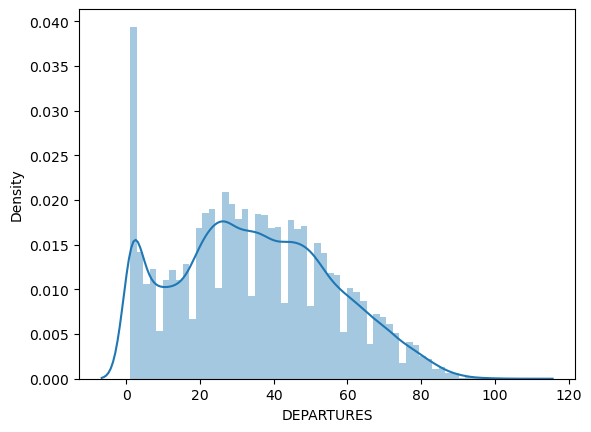

In [23]:
# checking once again with distribution plot

sns.distplot(grouped_flights['DEPARTURES'], bins=60)

# 4. Explore your data visually, looking for variables whose relationship you’d like to test

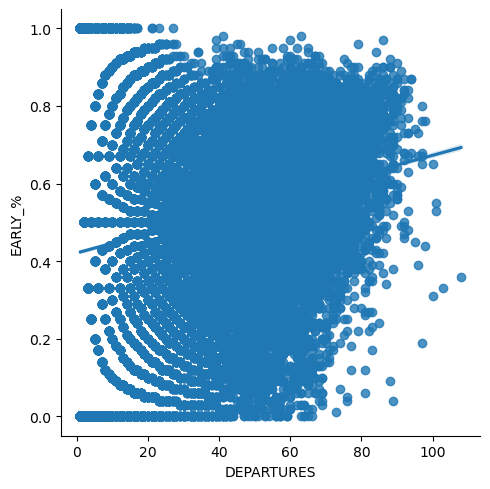

In [25]:
# creating scatterplot for DEPARTURES and EARLY_% (percentage of early departures)

sns.lmplot(x = 'DEPARTURES', y = 'EARLY_%', data = grouped_flights)

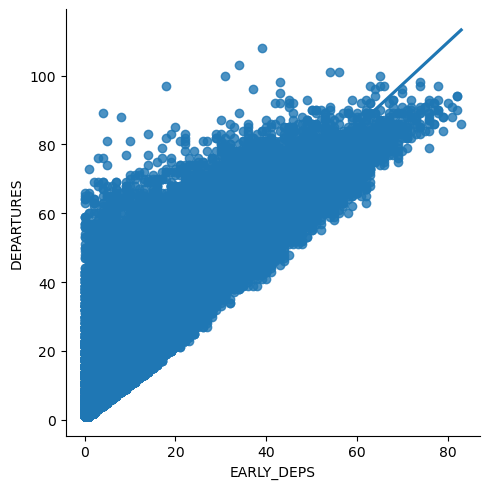

In [79]:
# creating scatterplot for DEPARTURES and EARLY_DEPS

sns.lmplot(x = 'EARLY_DEPS', y = 'DEPARTURES', data = grouped_flights)

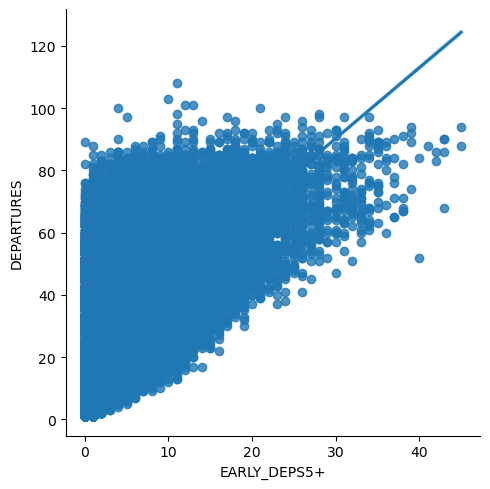

In [80]:
# creating scatterplot for DEPARTURES and EARLY_DEPS5+ (percentage of early departures)

sns.lmplot(x = 'EARLY_DEPS5+', y = 'DEPARTURES', data = grouped_flights)

# 5. State your hypothesis

As seen by the scatterplots, the relationship between the number of departures and the percentage of early departures is basically non-existent, which I found shocking. To continue with the task I'll use the following hypothesis which would be better exercise for the regression analysis, based on the second scatterplot above.

- As airport traffic (number of departures) decreases, the number of early departures increases.

# 6. Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable

In [81]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = grouped_flights['DEPARTURES'].values.reshape(-1,1)
y = grouped_flights['EARLY_DEPS'].values.reshape(-1,1)

In [82]:
X

array([[ 4],
       [24],
       [10],
       ...,
       [ 1],
       [15],
       [ 1]], dtype=int64)

In [83]:
y

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]])

# 7. Split the data into two sets: a training set and a test set

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 8. Run a linear regression on the data

In [85]:
# create a regression object

regression = LinearRegression()

In [86]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [87]:
# predict the values of y using X.

y_predicted = regression.predict(X_test)

# 9. Create a plot that shows the regression line on the test set

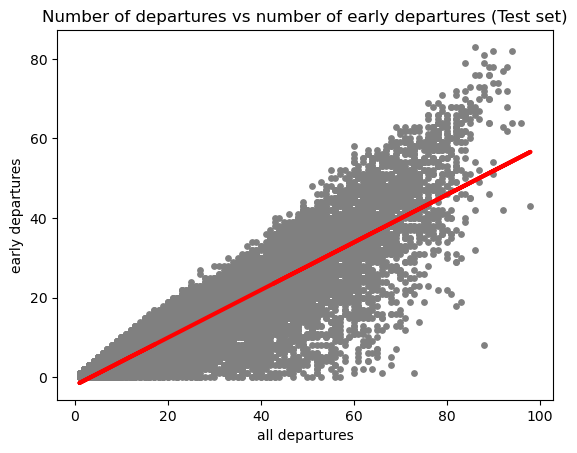

In [89]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of departures vs number of early departures (Test set)')
plot_test.xlabel('all departures')
plot_test.ylabel('early departures')
plot_test.show()

Although it shows a positive correlation, the line doesn't fit the data (it really can't) well. A large number of plots deviate greatly from the line, indicating a weak relationship between the two variables.  

# 10. Check the model performance statistics—MSE and R2 score.

In [91]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)  

In [92]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.59841534]]
Mean squared error:  59.06332186878647
R2 score:  0.7330890306593457


# 11. Compare the predicted y values with the actual y values in a dataframe

In [93]:
# Create a dataframe comparing the actual and predicted values of y.

performance = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
performance.head(30)

Actual  Predicted
0       35  23.721681
1       34  29.705834
2       32  26.713758
3        7  17.737528
4       22  20.131189
5       17   9.359713
6       25  35.091573
7        1   2.777144
8       31  27.910588
9        7   2.777144
10       2   3.973975
11      21  26.115342
12       0   1.580313
13      40  26.713758
14      34  27.312173
15       2   3.973975
16       0  -0.813348
17       0  -1.411763
18      40  33.894742
19      60  44.067803
20      19  12.950205
21      16  12.950205
22      23  29.107419
23      17  14.745451
24      13  12.351790
25      18  17.139112
26      21  30.304250
27      49  47.059879
28       6   8.162882
29       3   5.769221

Although the R2 score is relatively high (0.73), indicating a moderate to strong relatinship, we can see that our model isn't good enough to predict the values for the dependant variable. This indicates regression isn't the best tool to showcase the relationship between the number of departures and the number of early departures. It also shows there might be no overly significant relationship between these variables, as previously thought. 

The possible bias within this dataset (the original dataframe) is the fact we are examining only the 5 largest airports, and not a variaty of airports throughout the country of different sizes and capacities. It's possible that at a larger scale these variables would have a stronger relationship, but with America's busiest airports it seems to not be the case. 

# BONUS: Do the same regression, but with EARLY_%

### Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable

In [26]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = grouped_flights['DEPARTURES'].values.reshape(-1,1)
y = grouped_flights['EARLY_%'].values.reshape(-1,1)

In [27]:
X

array([[ 4],
       [24],
       [10],
       ...,
       [ 1],
       [15],
       [ 1]], dtype=int64)

In [28]:
y

array([[0.  ],
       [0.04],
       [0.  ],
       ...,
       [0.  ],
       [0.07],
       [0.  ]])

### Split the data into two sets: a training set and a test set

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Run a linear regression on the data

In [30]:
# create a regression object

regression = LinearRegression()

In [31]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [32]:
# predict the values of y using X.

y_predicted = regression.predict(X_test)

### Create a plot that shows the regression line on the test set\

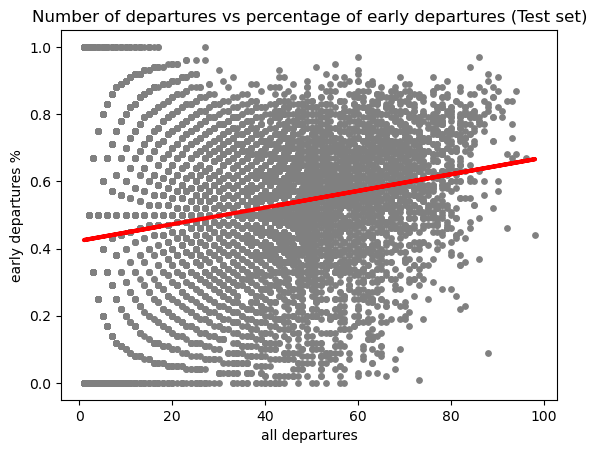

In [33]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of departures vs percentage of early departures (Test set)')
plot_test.xlabel('all departures')
plot_test.ylabel('early departures %')
plot_test.show()

### Check the model performance statistics—MSE and R2 score

In [34]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)  

In [35]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00248136]]
Mean squared error:  0.062001955305530924
R2 score:  0.04588777209256645


### Compare the predicted y values with the actual y values in a dataframe

In [36]:
# Create a dataframe comparing the actual and predicted values of y.

performance = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
performance.head(30)

Actual  Predicted
0     0.81   0.529372
1     0.64   0.554185
2     0.67   0.541778
3     0.21   0.504558
4     0.59   0.514483
5     0.89   0.469819
6     0.40   0.576518
7     0.12   0.442524
8     0.62   0.546741
9     0.88   0.442524
10    0.20   0.447487
11    0.45   0.539297
12    0.00   0.437561
13    0.83   0.541778
14    0.69   0.544260
15    0.20   0.447487
16    0.00   0.427636
17    0.00   0.425154
18    0.67   0.571555
19    0.78   0.613738
20    0.76   0.484707
21    0.64   0.484707
22    0.44   0.551704
23    0.61   0.492151
24    0.54   0.482226
25    0.56   0.502077
26    0.39   0.556667
27    0.60   0.626145
28    0.35   0.464856
29    0.23   0.454931